In [104]:
import pandas as pd

In [105]:
people = pd.ExcelFile('convid-19.xlsx').parse('people')
occurrence = pd.ExcelFile('convid-19.xlsx').parse('occurrence')
diagnosis = pd.ExcelFile('convid-19.xlsx').parse('diagnosis')
state = pd.ExcelFile('convid-19.xlsx').parse('state')
outcome = pd.ExcelFile('convid-19.xlsx').parse('outcome')
country = pd.ExcelFile('convid-19.xlsx').parse('country')
countrystats = pd.ExcelFile('convid-19.xlsx').parse('countrystats')
virus = pd.ExcelFile('convid-19.xlsx').parse('virus')
cluster = pd.ExcelFile('convid-19.xlsx').parse('cluster')
contact = pd.ExcelFile('convid-19.xlsx').parse('contact')

In [106]:
people.describe()

,people_id
count,179410.000000
mean,89705.500000
std,51791.350235
min,1.000000
25%,44853.250000
50%,89705.500000
75%,134557.750000
max,179410.000000


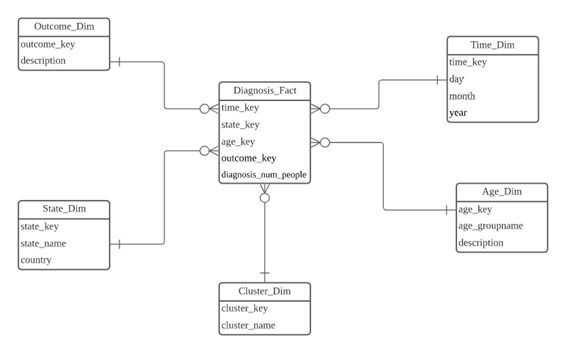

## Time_Dim

In [107]:
Time = occurrence[['date_of_occurrence']].drop_duplicates()

In [108]:
Time = Time.rename(columns={'date_of_occurrence': 'day'})

In [109]:
Time

,day
0,2020-01-22
29,2020-01-23
58,2020-01-24
90,2020-01-25
125,2020-01-26
...,...
51886,2020-07-24
52509,2020-07-25
53137,2020-07-26
53681,2020-07-27


In [110]:
Time['day1'] = Time['day'].apply(lambda x: x.day)
Time['month'] = Time['day'].apply(lambda x: x.month)
Time['year'] = Time['day'].apply(lambda x: x.year)
Time['key'] = Time.reset_index().index + 1

In [111]:
Time

,day,day1,month,year,key
0,2020-01-22,22,1,2020,1
29,2020-01-23,23,1,2020,2
58,2020-01-24,24,1,2020,3
90,2020-01-25,25,1,2020,4
125,2020-01-26,26,1,2020,5
...,...,...,...,...,...
51886,2020-07-24,24,7,2020,185
52509,2020-07-25,25,7,2020,186
53137,2020-07-26,26,7,2020,187
53681,2020-07-27,27,7,2020,188


## State_Dim

In [112]:
occurrence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54778 entries, 0 to 54777
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   occurrence_id       54778 non-null  int64         
 1   date_of_occurrence  54778 non-null  datetime64[ns]
 2   confirmed           54778 non-null  int64         
 3   deaths              54778 non-null  int64         
 4   recovered           54778 non-null  int64         
 5   active              54778 non-null  int64         
 6   fips_id             11201 non-null  float64       
 7   admin               6539 non-null   object        
 8   state_id            54778 non-null  int64         
 9   virus_id            54778 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 4.2+ MB


In [113]:
State = occurrence[['state_id']].drop_duplicates()

In [114]:
State

,state_id
0,6
1,7
2,8
3,9
4,2
...,...
47826,924
48530,991
49083,992
49084,993


In [115]:
joined = State.merge(state, on=["state_id"], how='left')
joined = joined.merge(country,on='country_id',how='left')
joined = joined[['state_id','name_x','name_y']]
State = joined.rename(columns={'state_id':'state_key','name_x': 'state_name','name_y':'country'})
State

,state_key,state_name,country
0,6,Anhui,Mainland China
1,7,Beijing,Mainland China
2,8,Chongqing,Mainland China
3,9,Fujian,Mainland China
4,2,Guangdong,Mainland China
...,...,...,...
983,924,Overijssel,Netherlands
984,991,Dadar Nagar Haveli,India
985,992,Utrecht,Netherlands
986,993,Zeeland,Netherlands


## Age_Dim

In [116]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179410 entries, 0 to 179409
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   people_id      179410 non-null  int64         
 1   first_name     179410 non-null  object        
 2   last_name      179410 non-null  object        
 3   sex            179406 non-null  object        
 4   date_of_birth  179410 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 6.8+ MB


In [117]:
pd.datetime.now()

<ipython-input-117-2c4a3ef4aee4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pd.datetime.now()


datetime.datetime(2020, 10, 22, 21, 30, 37, 815900)

In [118]:
people['age'] = (pd.datetime.now()-people['date_of_birth']).dt.days / 365.25

<ipython-input-118-baaadb8b212f>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  people['age'] = (pd.datetime.now()-people['date_of_birth']).dt.days / 365.25


In [119]:
people['age'] = people['age'].apply(lambda x:int(x))

In [120]:
people.describe()

,people_id,age
count,179410.000000,179410.000000
mean,89705.500000,36.748331
std,51791.350235,20.892367
min,1.000000,0.000000
25%,44853.250000,21.000000
50%,89705.500000,35.000000
75%,134557.750000,48.000000
max,179410.000000,142.000000


In [121]:
res1 = []
for i in range(200):
    res = []
    res.append(i)
    if i == 0:
        res.append(1)
        res.append('Infant')
        res.append('0~12 months')
    if i > 0 and i<=10:
        res.append(2)
        res.append('Child')
        res.append('1~10 years old')
    if i>10 and i<= 17:
        res.append(3)
        res.append('Young')
        res.append('11~17 years old')
    if i >=18 and i < 60:
        res.append(4)
        res.append('Middle-aged')
        res.append('18~59 years old')
    if i>=60 and i <70:
        res.append(5)
        res.append('Over than 60')
        res.append('60~69 years old')
    if i >=70:
        res.append(6)
        res.append('Over than 70')
        res.append('70+ years old')
    res1.append(res)
        
        

In [122]:
Age_zong = pd.DataFrame(res1,columns=['age','age_key','age_groupname','description'])

In [123]:
Age_zong

,age,age_key,age_groupname,description
0,0,1,Infant,0~12 months
1,1,2,Child,1~10 years old
2,2,2,Child,1~10 years old
3,3,2,Child,1~10 years old
4,4,2,Child,1~10 years old
...,...,...,...,...
195,195,6,Over than 70,70+ years old
196,196,6,Over than 70,70+ years old
197,197,6,Over than 70,70+ years old
198,198,6,Over than 70,70+ years old


In [124]:
Age = Age_zong[['age_key','age_groupname','description']].drop_duplicates()

In [125]:
Age

,age_key,age_groupname,description
0,1,Infant,0~12 months
1,2,Child,1~10 years old
11,3,Young,11~17 years old
18,4,Middle-aged,18~59 years old
60,5,Over than 60,60~69 years old
70,6,Over than 70,70+ years old


## Outcome_Dim

In [126]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261220 entries, 0 to 261219
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   diagnosis_id   261220 non-null  int64
 1   occurrence_id  261220 non-null  int64
 2   people_id      261220 non-null  int64
 3   outcome_id     261220 non-null  int64
dtypes: int64(4)
memory usage: 8.0 MB


In [127]:
outcome

,outcome_id,description
0,1,confirmed
1,2,recovered
2,3,death


In [128]:
Outcome = outcome.rename(columns={'outcome_id':'outcome_key'})

In [129]:
Outcome

,outcome_key,description
0,1,confirmed
1,2,recovered
2,3,death


## Cluster_Dim

In [130]:
Cluster = cluster.rename(columns={'cluster_id':'cluster_key'})

In [131]:
Cluster.loc[15] = [-1,'nan']

In [132]:
Cluster

,cluster_key,name
0,1,dolor
1,2,facilis
2,3,libero
3,4,totam
4,5,optio
5,6,delectus
6,7,voluptatem
7,8,molestias
8,9,facere
9,10,et


## Diagnosis_Fact

In [133]:
joined_1 = diagnosis.merge(occurrence[['occurrence_id','date_of_occurrence','state_id']],on='occurrence_id',how='left')
# joined = Trip[["ShipName", "ShipType", "Nationality"]].merge(DimShip, on=["ShipName", "ShipType", "Nationality"], how='left', indicator=True)
joined_1

,diagnosis_id,occurrence_id,people_id,outcome_id,date_of_occurrence,state_id
0,1,123,1,1,2020-01-25,43
1,2,123,2,1,2020-01-25,43
2,3,123,3,1,2020-01-25,43
3,4,123,4,1,2020-01-25,43
4,5,201,5,1,2020-01-27,57
...,...,...,...,...,...,...
261215,261216,56515,162493,3,2020-07-27,88
261216,261217,56515,162530,3,2020-07-27,88
261217,261218,56515,162450,3,2020-07-27,88
261218,261219,56515,162495,3,2020-07-27,88


In [134]:
joined_2 = joined_1.merge(people[['people_id','age']],on='people_id',how='left')
joined_2

,diagnosis_id,occurrence_id,people_id,outcome_id,date_of_occurrence,state_id,age
0,1,123,1,1,2020-01-25,43,3
1,2,123,2,1,2020-01-25,43,34
2,3,123,3,1,2020-01-25,43,16
3,4,123,4,1,2020-01-25,43,19
4,5,201,5,1,2020-01-27,57,32
...,...,...,...,...,...,...,...
261215,261216,56515,162493,3,2020-07-27,88,97
261216,261217,56515,162530,3,2020-07-27,88,88
261217,261218,56515,162450,3,2020-07-27,88,61
261218,261219,56515,162495,3,2020-07-27,88,110


In [135]:
Contact = contact[['to_people_id','cluster_id']].drop_duplicates(subset=['to_people_id'],keep='first')

In [136]:
joined_3 = joined_2.merge(Contact,left_on='people_id',right_on='to_people_id',how='left')
joined_3

,diagnosis_id,occurrence_id,people_id,outcome_id,date_of_occurrence,state_id,age,to_people_id,cluster_id
0,1,123,1,1,2020-01-25,43,3,1.0,2
1,2,123,2,1,2020-01-25,43,34,NaN,NaN
2,3,123,3,1,2020-01-25,43,16,NaN,NaN
3,4,123,4,1,2020-01-25,43,19,NaN,NaN
4,5,201,5,1,2020-01-27,57,32,NaN,NaN
...,...,...,...,...,...,...,...,...,...
261215,261216,56515,162493,3,2020-07-27,88,97,NaN,NaN
261216,261217,56515,162530,3,2020-07-27,88,88,NaN,NaN
261217,261218,56515,162450,3,2020-07-27,88,61,NaN,NaN
261218,261219,56515,162495,3,2020-07-27,88,110,NaN,NaN


In [137]:
joined_4 = joined_3.merge(Age_zong[['age','age_key']],on='age',how='left')
joined_4

,diagnosis_id,occurrence_id,people_id,outcome_id,date_of_occurrence,state_id,age,to_people_id,cluster_id,age_key
0,1,123,1,1,2020-01-25,43,3,1.0,2,2
1,2,123,2,1,2020-01-25,43,34,NaN,NaN,4
2,3,123,3,1,2020-01-25,43,16,NaN,NaN,3
3,4,123,4,1,2020-01-25,43,19,NaN,NaN,4
4,5,201,5,1,2020-01-27,57,32,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...
261215,261216,56515,162493,3,2020-07-27,88,97,NaN,NaN,6
261216,261217,56515,162530,3,2020-07-27,88,88,NaN,NaN,6
261217,261218,56515,162450,3,2020-07-27,88,61,NaN,NaN,5
261218,261219,56515,162495,3,2020-07-27,88,110,NaN,NaN,6


In [138]:
joined_4 = joined_4.fillna(0)

In [139]:
joined_4.groupby(['people_id']).count()

,diagnosis_id,occurrence_id,outcome_id,date_of_occurrence,state_id,age,to_people_id,cluster_id,age_key
people_id,,,,,,,,,
1,2,2,2,2,2,2,2,2,2
2,2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,2
5,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...
179362,1,1,1,1,1,1,1,1,1
179363,1,1,1,1,1,1,1,1,1
179364,1,1,1,1,1,1,1,1,1


In [140]:
fact_1 = joined_4.groupby(['date_of_occurrence','state_id','age_key','outcome_id','cluster_id']).count()['people_id'].reset_index()

In [141]:
fact_2 = fact_1.merge(Time,left_on='date_of_occurrence',right_on='day',how='left')
fact_3 = fact_2.rename(columns={'state_id':'state_key','outcome_id':'outcome_key','key':'time_key','people_id':'diagnosis_num_people','cluster_id':'cluster_key'})

In [142]:
Diagnosis = fact_3[['time_key','state_key','age_key','outcome_key','cluster_key','diagnosis_num_people']]

In [143]:
Diagnosis

,time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people
0,1,22,4,1,0,1
1,2,22,4,1,0,1
2,4,43,2,1,2,1
3,4,43,3,1,0,1
4,4,43,4,1,0,2
...,...,...,...,...,...,...
6519,189,129,4,1,11,10
6520,189,129,4,2,11,3
6521,189,130,4,1,5,1
6522,189,130,4,2,11,1


# Load

In [151]:
import pyodbc
db = pyodbc.connect('DRIVER={SQL Server};SERVER=DESKTOP-U4JI0UF;DATABASE=CS689_pro;Trusted_Connection=yes')
cursor = db.cursor()

In [152]:
cursor.execute('''create table Time_Dim(
time_key int,
day int,
month int,
year int
);''')


In [153]:
db.commit()

In [154]:
for i,row in Time.iterrows():
    sql = "INSERT INTO Time_Dim(time_key,day,month,year) values (" + str(row.key) + "," + str(row.day1) + ", " + str(row.month) + "," + str(row.year) + ");"
    cursor.execute(sql)
    print(sql)

INSERT INTO Time_Dim(time_key,day,month,year) values (1,22, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (2,23, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (3,24, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (4,25, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (5,26, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (6,27, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (7,28, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (8,29, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (9,30, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (10,31, 1,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (11,1, 2,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (12,2, 2,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (13,3, 2,2020);
INSERT INTO Time_Dim(time_key,day,month,year) values (14,4, 2,2020);
INSERT INTO Time_Dim(time_key,day

In [155]:
db.commit()

In [156]:
cursor.execute('''create table State_Dim(
state_key int,
state_name varchar(50),
country varchar(50)
);''')

In [157]:
db.commit()

In [158]:
for i,row in State.iterrows():
    sql = "INSERT INTO State_Dim(state_key,state_name,country) values (" + str(row.state_key) + ",'" + str(row.state_name).replace("'","''") + "', '" + str(row.country).replace("'","''") + "');"
    cursor.execute(sql)
    print(sql)

INSERT INTO State_Dim(state_key,state_name,country) values (6,'Anhui', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (7,'Beijing', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (8,'Chongqing', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (9,'Fujian', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (2,'Guangdong', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (11,'Guangxi', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (12,'Guizhou', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (13,'Hainan', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (14,'Hebei', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (3,'Henan', 'Mainland China');
INSERT INTO State_Dim(state_key,state_name,country) values (1,'Hubei', 'Mainland

INSERT INTO State_Dim(state_key,state_name,country) values (585,'Ceuta', 'Spain');
INSERT INTO State_Dim(state_key,state_name,country) values (586,'Emilia-Romagna', 'Italy');
INSERT INTO State_Dim(state_key,state_name,country) values (587,'Extremadura', 'Spain');
INSERT INTO State_Dim(state_key,state_name,country) values (588,'Friuli Venezia Giulia', 'Italy');
INSERT INTO State_Dim(state_key,state_name,country) values (589,'Galicia', 'Spain');
INSERT INTO State_Dim(state_key,state_name,country) values (590,'Hamburg', 'Germany');
INSERT INTO State_Dim(state_key,state_name,country) values (591,'Hessen', 'Germany');
INSERT INTO State_Dim(state_key,state_name,country) values (592,'La Rioja', 'Spain');
INSERT INTO State_Dim(state_key,state_name,country) values (593,'Lazio', 'Italy');
INSERT INTO State_Dim(state_key,state_name,country) values (594,'Liguria', 'Italy');
INSERT INTO State_Dim(state_key,state_name,country) values (595,'Lombardia', 'Italy');
INSERT INTO State_Dim(state_key,state_

In [159]:
db.commit()

In [160]:
cursor.execute('''create table Age_Dim(
age_key int,
age_groupname varchar(40),
description varchar(40)
);''')

In [161]:
db.commit()

In [162]:
for i,row in Age.iterrows():
    sql = "INSERT INTO Age_Dim(age_key,age_groupname,description) values (" + str(row.age_key) + ",'" + str(row.age_groupname).replace("'","''") + "', '" + str(row.description).replace("'","''") + "');"
    cursor.execute(sql)
    print(sql)

INSERT INTO Age_Dim(age_key,age_groupname,description) values (1,'Infant', '0~12 months');
INSERT INTO Age_Dim(age_key,age_groupname,description) values (2,'Child', '1~10 years old');
INSERT INTO Age_Dim(age_key,age_groupname,description) values (3,'Young', '11~17 years old');
INSERT INTO Age_Dim(age_key,age_groupname,description) values (4,'Middle-aged', '18~59 years old');
INSERT INTO Age_Dim(age_key,age_groupname,description) values (5,'Over than 60', '60~69 years old');
INSERT INTO Age_Dim(age_key,age_groupname,description) values (6,'Over than 70', '70+ years old');


In [163]:
db.commit()

In [164]:
cursor.execute('''create table Outcome_Dim(
outcome_key int,
description varchar(40)
);''')

In [165]:
db.commit()

In [166]:
for i,row in Outcome.iterrows():
    sql = "INSERT INTO Outcome_Dim(outcome_key,description) values (" + str(row.outcome_key) + ",'" +  str(row.description).replace("'","''") + "');"
    cursor.execute(sql)
    print(sql)

INSERT INTO Outcome_Dim(outcome_key,description) values (1,'confirmed');
INSERT INTO Outcome_Dim(outcome_key,description) values (2,'recovered');
INSERT INTO Outcome_Dim(outcome_key,description) values (3,'death');


In [167]:
db.commit()

In [168]:
cursor.execute('''create table Cluster_Dim(
cluster_key int,
cluster_name varchar(50)
);''')

In [169]:
db.commit()

In [170]:
Cluster = Cluster.rename(columns={'name':'cluster_name'})
for i,row in Cluster.iterrows():
    sql = "INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (" + str(row.cluster_key) + ",'" +  str(row.cluster_name)+ "');"
    cursor.execute(sql)

    print(sql)

INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (1,'dolor');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (2,'facilis');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (3,'libero');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (4,'totam');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (5,'optio');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (6,'delectus');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (7,'voluptatem');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (8,'molestias');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (9,'facere');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (10,'et');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (11,'enim');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (12,'vero');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (13,'sed');
INSERT INTO Cluster_Dim(cluster_key,cluster_name) values (14,'numquam');
INSE

In [171]:
Cluster

,cluster_key,cluster_name
0,1,dolor
1,2,facilis
2,3,libero
3,4,totam
4,5,optio
5,6,delectus
6,7,voluptatem
7,8,molestias
8,9,facere
9,10,et


In [172]:
db.commit()

In [173]:
cursor.execute('''create table Diagnosis_Fact(
time_key int,
state_key int,
age_key int,
outcome_key int,
cluster_key int,
diagnosis_num_people int
);''')

In [174]:
db.commit()

In [177]:
for i,row in Diagnosis.iterrows():
    sql = "INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (" + str(row.time_key) + "," + str(row.state_key) + ", " + str(row.age_key) + "," + str(row.outcome_key) + "," + str(row.cluster_key) + "," + str(row.diagnosis_num_people) + ");"
    cursor.execute(sql)
    print(sql)

INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (1,22, 4,1,0,1);
INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (2,22, 4,1,0,1);
INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (4,43, 2,1,2,1);
INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (4,43, 3,1,0,1);
INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (4,43, 4,1,0,2);
INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (5,22, 4,1,0,3);
INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (6,22, 4,1,0,1);
INSERT INTO Diagnosis_Fact(time_key,state_key,age_key,outcome_key,cluster_key,diagnosis_num_people) values (6,57, 3,1,0,2);
INSERT I

ProgrammingError: ('42000', '[42000] [Microsoft][ODBC SQL Server Driver][SQL Server]“N”附近有语法错误。 (102) (SQLExecDirectW)')

In [176]:
db.commit()